# Initializing project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/AMC Data"
# project_path = './'

amc_stock = pd.read_csv(project_path+'/AMC Stock Data.csv') #181 of sample
amc_liwc = pd.read_csv(project_path+'/amc_liwc.csv') #112240 of samples

In [3]:
amc_liwc.shape #112240

(112240, 97)

In [4]:
amc_liwc['Datetime']

0         2020-12-06 23:34:01+00:00
1         2020-12-06 22:51:31+00:00
2         2020-12-06 22:47:58+00:00
3         2020-12-06 22:46:19+00:00
4         2020-12-06 22:20:15+00:00
                    ...            
112235    2021-02-07 00:04:17+00:00
112236    2021-02-07 00:02:34+00:00
112237    2021-02-07 00:02:19+00:00
112238    2021-02-07 00:00:53+00:00
112239    2021-02-07 00:00:10+00:00
Name: Datetime, Length: 112240, dtype: object

# Preparing data
In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [6]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
amc_liwc_date = amc_liwc['Datetime'].to_numpy()
amc_liwc_pos = amc_liwc['posemo'].to_numpy()
amc_liwc_neg = amc_liwc['negemo'].to_numpy()

In [7]:
amc_liwc_pos

array([2.5 , 4.  , 0.  , ..., 0.  , 3.45, 0.  ])

In [8]:
#Cleaning amc data
for i in range(len(amc_liwc_date)):
  amc_liwc_date[i] = amc_liwc_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  amc_liwc_date[i]=time.strptime(amc_liwc_date[i],'%Y-%m-%d') 
  amc_liwc_date[i]=time.strftime('%m/%d/%Y',amc_liwc_date[i])

In [ ]:
amc_liwc_date

In [9]:
#put amc liwc data in df
amc_liwc_df = pd.DataFrame({
    'Date':amc_liwc_date,
    'pos':amc_liwc_pos,
    'neg':amc_liwc_neg
})
#combine data on the same date(caculate the descriptive statistics of "neg","pos")
#mean
amc_liwc_df_mean = amc_liwc_df.groupby(['Date']).agg({'pos':np.mean,'neg':np.mean}).reset_index()
#median
amc_liwc_df_median = amc_liwc_df.groupby(['Date']).agg({'pos':np.median,'neg':np.median}).reset_index()
#std
amc_liwc_df_std = amc_liwc_df.groupby(['Date']).agg({'pos':np.std,'neg':np.std}).reset_index()
#max
amc_liwc_df_max = amc_liwc_df.groupby(['Date']).agg({'pos':np.max,'neg':np.max}).reset_index()
#min
amc_liwc_df_min = amc_liwc_df.groupby(['Date']).agg({'pos':np.min,'neg':np.min}).reset_index()
#skewness
amc_liwc_df_skewness = amc_liwc_df.groupby(['Date']).agg({'pos':stats.skew,'neg':stats.skew}).reset_index()
#kurtosis
amc_liwc_df_kurtosis = amc_liwc_df.groupby(['Date']).agg({'pos':stats.kurtosis,'neg':stats.kurtosis}).reset_index()
#Jarque-Bera
#To test if the data have normal distribution base on skewness and kurotsis


In [10]:
#clean the stock date(taking datetime and close from stock data)
amc_stock_date = amc_stock['Date'].to_numpy()
amc_stock_close = amc_stock['Close'].to_numpy()

In [11]:
#get stock date and change format
for i in range(len(amc_stock_date)):
  amc_stock_date[i] = amc_stock_date[i].split()[0]
  amc_stock_date[i]=time.strptime(amc_stock_date[i],'%m/%d/%Y')
  amc_stock_date[i]=time.strftime('%m/%d/%Y',amc_stock_date[i])

In [12]:
#put amc stock data in df
amc_stock_df = pd.DataFrame({
    'Date':amc_stock_date,
    'close':amc_stock_close
})
#amc_stock_df

In [13]:
#merge liwc mean data and stock data
amc_merge_df_mean = pd.merge(amc_liwc_df_mean,amc_stock_df,on='Date',how="left")
amc_merge_df_mean = amc_merge_df_mean.dropna().reset_index(drop=True)


#median
amc_merge_df_median = pd.merge(amc_liwc_df_median,amc_stock_df,on='Date',how="left")
amc_merge_df_median = amc_merge_df_median.dropna().reset_index(drop=True)

#std
amc_merge_df_std = pd.merge(amc_liwc_df_std,amc_stock_df,on='Date',how="left")
amc_merge_df_std = amc_merge_df_std.dropna().reset_index(drop=True)

#max
amc_merge_df_max = pd.merge(amc_liwc_df_max,amc_stock_df,on='Date',how="left")
amc_merge_df_max = amc_merge_df_max.dropna().reset_index(drop=True)

#min
amc_merge_df_min = pd.merge(amc_liwc_df_min,amc_stock_df,on='Date',how="left")
amc_merge_df_min = amc_merge_df_min.dropna().reset_index(drop=True)

amc_merge_df_mean.shape #51 days worth of data

(51, 4)

In [ ]:
#amc_merge_df_min

# Training the linear model

Training the linear model for AMC

In [14]:
#Creating a model based on the amc data
#amc_merge_df[['pos','neg']] is the data or x or feature
#amc_merge_df[['close']] is the label
#mean
reg_amc_mean = LinearRegression().fit(amc_merge_df_mean[['pos','neg']][:-10], amc_merge_df_mean[['close']][:-10])
#median
reg_amc_median = LinearRegression().fit(amc_merge_df_median[['pos','neg']][:-10], amc_merge_df_median[['close']][:-10])
#std
reg_amc_std = LinearRegression().fit(amc_merge_df_std[['pos','neg']][:-10], amc_merge_df_std[['close']][:-10])
#max
reg_amc_max = LinearRegression().fit(amc_merge_df_max[['pos','neg']][:-10], amc_merge_df_max[['close']][:-10])
#min
reg_amc_min = LinearRegression().fit(amc_merge_df_min[['pos','neg']][:-10], amc_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict AMC model with all feature

In [15]:
#each model is predicting the label using the data that we have
#pred_amc is a numpy array consisting the values of prediction of the amc data that we use for the training
#mean 
pred_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['pos','neg']][-10:])
#median
pred_amc_median = reg_amc_median.predict(amc_merge_df_median[['pos','neg']][-10:])
#std
pred_amc_std = reg_amc_std.predict(amc_merge_df_std[['pos','neg']][-10:])
#max
pred_amc_max = reg_amc_max.predict(amc_merge_df_max[['pos','neg']][-10:])
#min
pred_amc_min = reg_amc_min.predict(amc_merge_df_min[['pos','neg']][-10:])

#To plot the training model
#mean 
train_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['pos','neg']][:-10])
#median
train_amc_median = reg_amc_median.predict(amc_merge_df_median[['pos','neg']][:-10])
#std
train_amc_std = reg_amc_std.predict(amc_merge_df_std[['pos','neg']][:-10])
#max
train_amc_max = reg_amc_max.predict(amc_merge_df_max[['pos','neg']][:-10])
#min
train_amc_min = reg_amc_min.predict(amc_merge_df_min[['pos','neg']][:-10])


#In this part, I am combining the data  of each company with the prediction
#mean
amc_merge_pred_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_mean,columns=['pred'])], axis=1)
#median
amc_merge_pred_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_median,columns=['pred'])], axis=1)
#std
amc_merge_pred_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_std,columns=['pred'])], axis=1)
#max
amc_merge_pred_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_max,columns=['pred'])], axis=1)
#min
amc_merge_pred_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_min,columns=['pred'])], axis=1)


Display the perfomance of the model

In [17]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
amc_score_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_mean)
#median
amc_score_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_median)
#std
amc_score_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_std)
#max
amc_score_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_max)
#min
amc_score_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_min)
[amc_score_mean,amc_score_median,amc_score_std,amc_score_max,amc_score_min]

[9.219492038937332,
 5.996233999999997,
 6.291635801114895,
 0.5897626663130617,
 5.923703444378345]

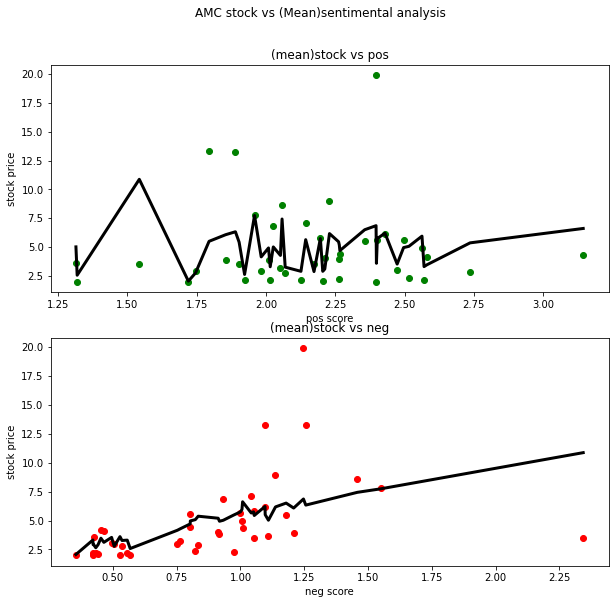

In [18]:
#plot amc
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Mean)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_mean = amc_merge_pred_mean.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_mean[['pos']],amc_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_mean[['pos']], amc_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('(mean)stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_mean = amc_merge_pred_mean.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_mean[['neg']],amc_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_mean[['neg']], amc_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('(mean)stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

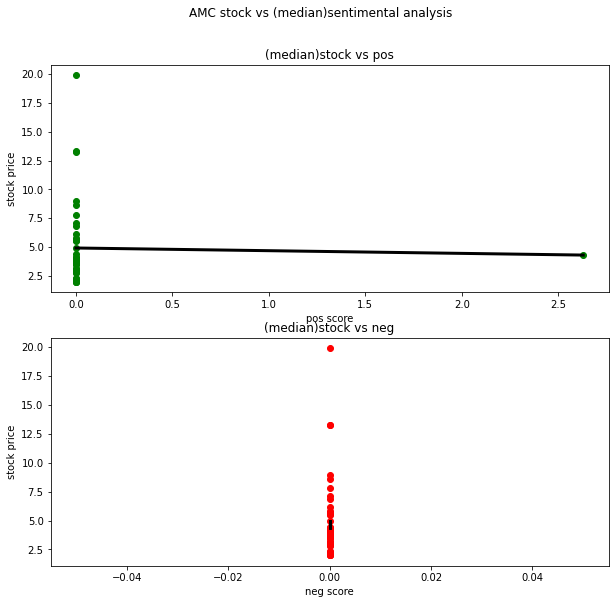

In [19]:
#Median sentimental analysis
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (median)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_median = amc_merge_pred_median.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_median[['pos']],amc_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_median[['pos']], amc_sort_pos_median[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('(median)stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_median = amc_merge_pred_median.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_median[['neg']],amc_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_median[['neg']], amc_sort_neg_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('(median)stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')

plt.show()

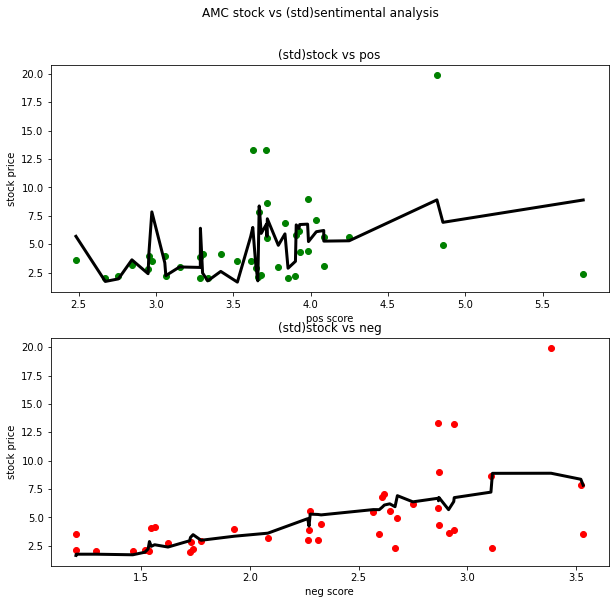

In [20]:
#std sentimental analysis
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (std)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_std = amc_merge_pred_std.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_std[['pos']],amc_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_std[['pos']], amc_sort_pos_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('(std)stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_std = amc_merge_pred_std.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_std[['neg']],amc_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_std[['neg']], amc_sort_neg_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('(std)stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

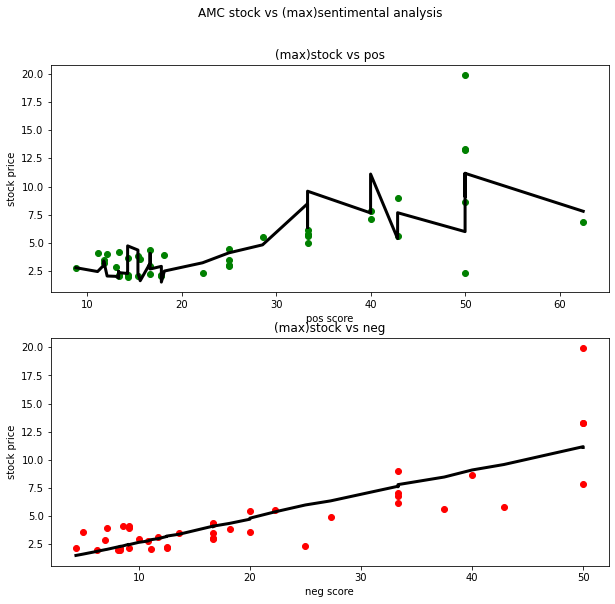

In [21]:
#Max sentimental analysis
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (max)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_max = amc_merge_pred_max.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_max[['pos']],amc_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_max[['pos']], amc_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('(max)stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_max = amc_merge_pred_max.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_max[['neg']],amc_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_max[['neg']], amc_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('(max)stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

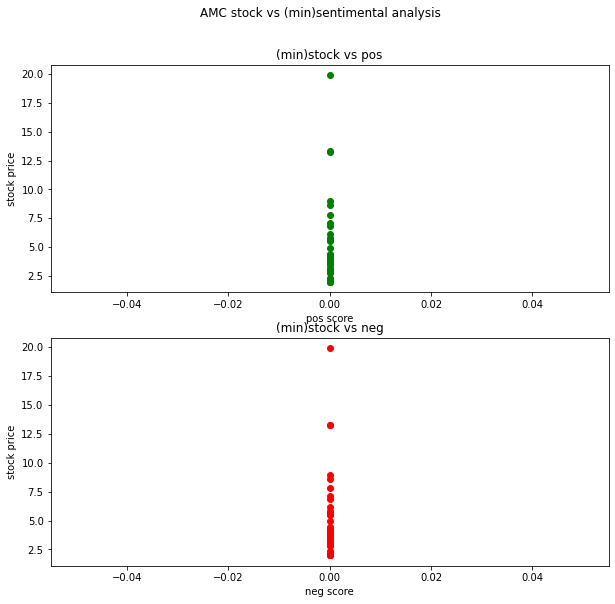

In [22]:
#Min sentimental analysis
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (min)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_min = amc_merge_pred_min.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_min[['pos']],amc_sort_pos_min[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_min[['pos']], amc_sort_pos_min[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('(min)stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_min = amc_merge_pred_min.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_min[['neg']],amc_sort_neg_min[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_min[['neg']], amc_sort_neg_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('(min)stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

# Plot data against time

Plotting AMC stock with mean sentimental analysis

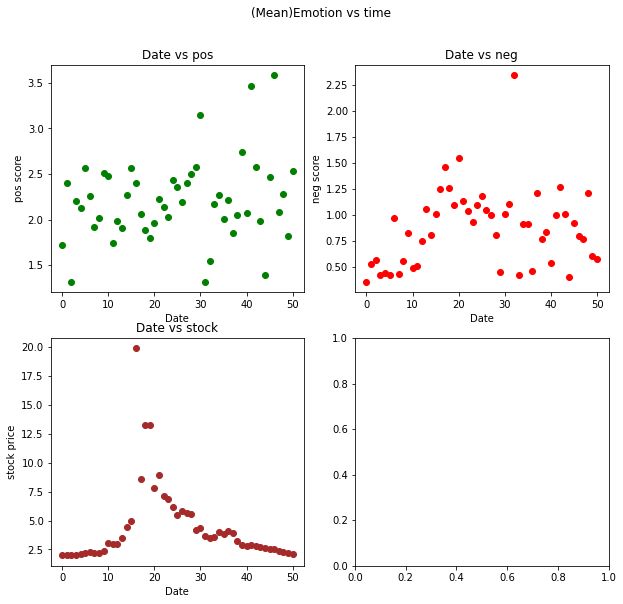

In [23]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(10,8)

amc_sort_pos_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_pos_mean.shape[0])],amc_sort_pos_mean[['pos']],color='green',label='pos')
axs[0,0].set_title('Date vs pos')
axs[0,0].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_neg_mean.shape[0])],amc_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,1].set_title('Date vs neg')
axs[0,1].set(xlabel='Date', ylabel='neg score')

amc_sort_date = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[1,0].set_title('Date vs stock')
axs[1,0].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with median sentimental analysis

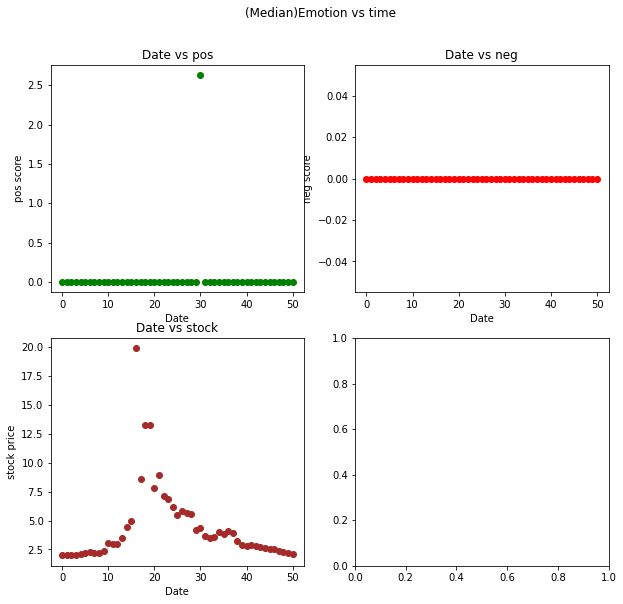

In [24]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(10,8)

amc_sort_pos_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_pos_median.shape[0])],amc_sort_pos_median[['pos']],color='green',label='pos')
axs[0,0].set_title('Date vs pos')
axs[0,0].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_neg_median.shape[0])],amc_sort_neg_median[['neg']],color='red',label='neg')
axs[0,1].set_title('Date vs neg')
axs[0,1].set(xlabel='Date', ylabel='neg score')

amc_sort_date = amc_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[1,0].set_title('Date vs stock')
axs[1,0].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with std sentimental analysis

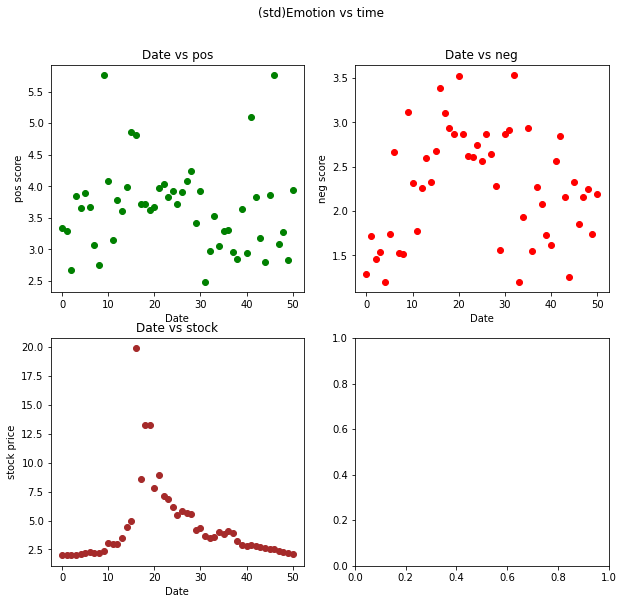

In [25]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(std)Emotion vs time')
fig.set_size_inches(10,8)

amc_sort_pos_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_pos_std.shape[0])],amc_sort_pos_std[['pos']],color='green',label='pos')
axs[0,0].set_title('Date vs pos')
axs[0,0].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_neg_std.shape[0])],amc_sort_neg_std[['neg']],color='red',label='neg')
axs[0,1].set_title('Date vs neg')
axs[0,1].set(xlabel='Date', ylabel='neg score')

amc_sort_date = amc_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[1,0].set_title('Date vs stock')
axs[1,0].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with maximum sentimental analysis

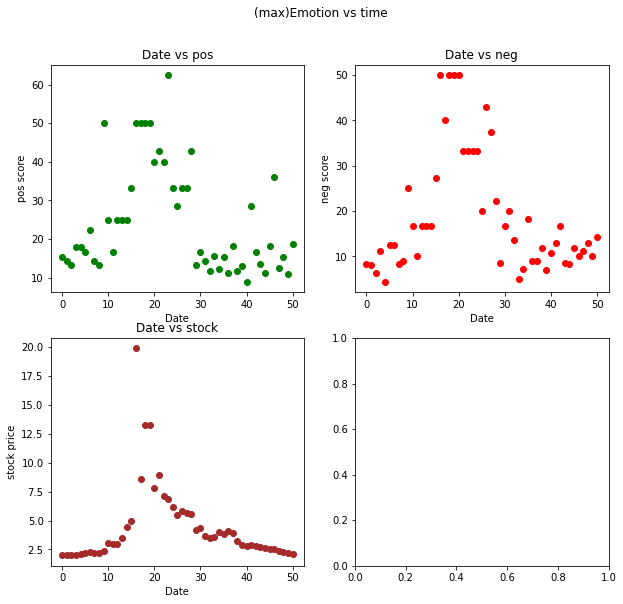

In [26]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(max)Emotion vs time')
fig.set_size_inches(10,8)

amc_sort_pos_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_pos_max.shape[0])],amc_sort_pos_max[['pos']],color='green',label='pos')
axs[0,0].set_title('Date vs pos')
axs[0,0].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_neg_max.shape[0])],amc_sort_neg_max[['neg']],color='red',label='neg')
axs[0,1].set_title('Date vs neg')
axs[0,1].set(xlabel='Date', ylabel='neg score')

amc_sort_date = amc_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[1,0].set_title('Date vs stock')
axs[1,0].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with minimum sentimental analysis

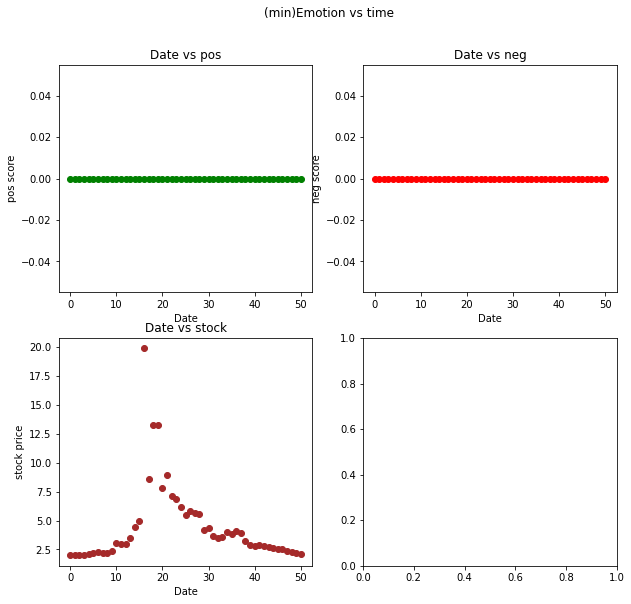

In [27]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(min)Emotion vs time')
fig.set_size_inches(10,8)

amc_sort_pos_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_pos_min.shape[0])],amc_sort_pos_min[['pos']],color='green',label='pos')
axs[0,0].set_title('Date vs pos')
axs[0,0].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_neg_min.shape[0])],amc_sort_neg_min[['neg']],color='red',label='neg')
axs[0,1].set_title('Date vs neg')
axs[0,1].set(xlabel='Date', ylabel='neg score')

amc_sort_date = amc_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[1,0].set_title('Date vs stock')
axs[1,0].set(xlabel='Date', ylabel='stock price')
plt.show()

# Training with different method

Training with mean sentimental analysis

In [ ]:
#Training models based on the amc data for four features(neg,pos) separately
reg_amc_pos_mean = LinearRegression().fit(amc_merge_df_mean[['pos']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_neg_mean = LinearRegression().fit(amc_merge_df_mean[['neg']][:-10], amc_merge_df_mean[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_pos_mean = reg_amc_pos_mean.predict(amc_merge_df_mean[['pos']][-10:])
pred_amc_neg_mean = reg_amc_neg_mean.predict(amc_merge_df_mean[['neg']][-10:])

#predict on the training model to plot the data
train_amc_pos_mean = reg_amc_pos_mean.predict(amc_merge_df_mean[['pos']][:-10])
train_amc_neg_mean = reg_amc_neg_mean.predict(amc_merge_df_mean[['neg']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_pos_mean,columns=['pred_pos'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_neg_mean,columns=['pred_neg'])], axis=1)

amc_merge_pred1_mean

In [ ]:
amc_score_pos_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_pos_mean)
amc_score_neg_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_neg_mean)
[amc_score_pos_mean,amc_score_neg_mean]

In [ ]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (mean)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_mean = amc_merge_pred1_mean.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_mean[['pos']],amc_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_mean[['pos']], amc_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_mean = amc_merge_pred1_mean.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_mean[['neg']],amc_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_mean[['neg']], amc_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

Training with median sentimental analysis

In [ ]:
#Training models based on the amc data for four features(neg,pos) separately
reg_amc_pos_median = LinearRegression().fit(amc_merge_df_median[['pos']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_neg_median = LinearRegression().fit(amc_merge_df_median[['neg']][:-10], amc_merge_df_median[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_pos_median = reg_amc_pos_median.predict(amc_merge_df_median[['pos']][-10:])
pred_amc_neg_median = reg_amc_neg_median.predict(amc_merge_df_median[['neg']][-10:])

#predict on the training model to plot the data
train_amc_pos_median = reg_amc_pos_median.predict(amc_merge_df_median[['pos']][:-10])
train_amc_neg_median = reg_amc_neg_median.predict(amc_merge_df_median[['neg']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_pos_median,columns=['pred_pos'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_neg_median,columns=['pred_neg'])], axis=1)

amc_merge_pred1_median

In [ ]:
amc_score_pos_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_pos_median)
amc_score_neg_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_neg_median)
[amc_score_pos_median,amc_score_neg_median]

In [ ]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Median)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_median = amc_merge_pred1_median.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_median[['pos']],amc_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_median[['pos']], amc_sort_pos_median[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_median = amc_merge_pred1_median.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_median[['neg']],amc_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_median[['neg']], amc_sort_neg_median[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()

Training with std sentimental analysis

In [ ]:
#Training models based on the amc data for four features(neg,pos) separately
reg_amc_pos_std = LinearRegression().fit(amc_merge_df_std[['pos']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_neg_std = LinearRegression().fit(amc_merge_df_std[['neg']][:-10], amc_merge_df_std[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_pos_std = reg_amc_pos_std.predict(amc_merge_df_std[['pos']][-10:])
pred_amc_neg_std = reg_amc_neg_std.predict(amc_merge_df_std[['neg']][-10:])

#predict on the training model to plot the data
train_amc_pos_std = reg_amc_pos_std.predict(amc_merge_df_std[['pos']][:-10])
train_amc_neg_std = reg_amc_neg_std.predict(amc_merge_df_std[['neg']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_pos_std,columns=['pred_pos'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_neg_std,columns=['pred_neg'])], axis=1)

amc_merge_pred1_std

In [ ]:
amc_score_pos_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_pos_std)
amc_score_neg_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_neg_std)
[amc_score_pos_std,amc_score_neg_std]

In [ ]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Std)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_std = amc_merge_pred1_std.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_std[['pos']],amc_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_std[['pos']], amc_sort_pos_std[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_std = amc_merge_pred1_std.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_std[['neg']],amc_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_std[['neg']], amc_sort_neg_std[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')

plt.show()

Training with maximum sentimental analysis

In [ ]:
#Training models based on the amc data for four features(neg,pos) separately
reg_amc_pos_max = LinearRegression().fit(amc_merge_df_max[['pos']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_neg_max = LinearRegression().fit(amc_merge_df_max[['neg']][:-10], amc_merge_df_max[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_pos_max = reg_amc_pos_max.predict(amc_merge_df_max[['pos']][-10:])
pred_amc_neg_max = reg_amc_neg_max.predict(amc_merge_df_max[['neg']][-10:])

#predict on the training model to plot the data
train_amc_pos_max = reg_amc_pos_max.predict(amc_merge_df_max[['pos']][:-10])
train_amc_neg_max = reg_amc_neg_max.predict(amc_merge_df_max[['neg']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_pos_max,columns=['pred_pos'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_neg_max,columns=['pred_neg'])], axis=1)

amc_merge_pred1_max

In [ ]:
amc_score_pos_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_pos_max)
amc_score_neg_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_neg_max)
[amc_score_pos_max,amc_score_neg_max]

In [ ]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Max)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_max = amc_merge_pred1_max.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_max[['pos']],amc_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_max[['pos']], amc_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')


amc_sort_neg_max = amc_merge_pred1_max.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_max[['neg']],amc_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_max[['neg']], amc_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')

plt.show()

Training with minimum sentimental analysis

In [ ]:
#Training models based on the amc data for four features(neg,neu,pos,com) separately
reg_amc_pos_min = LinearRegression().fit(amc_merge_df_min[['pos']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_neg_min = LinearRegression().fit(amc_merge_df_min[['neg']][:-10], amc_merge_df_min[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_pos_min = reg_amc_pos_min.predict(amc_merge_df_min[['pos']][-10:])
pred_amc_neg_min = reg_amc_neg_min.predict(amc_merge_df_min[['neg']][-10:])

#predict on the training model to plot the data
train_amc_pos_min = reg_amc_pos_min.predict(amc_merge_df_min[['pos']][:-10])
train_amc_neg_min = reg_amc_neg_min.predict(amc_merge_df_min[['neg']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_pos_min,columns=['pred_pos'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_neg_min,columns=['pred_neg'])], axis=1)

amc_merge_pred1_min

In [ ]:
amc_score_neg_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_neg_min)
amc_score_pos_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_pos_min)
[amc_score_pos_min,amc_score_neg_min]

In [ ]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Min)sentimental analysis')
fig.set_size_inches(10,8)

amc_sort_pos_min = amc_merge_pred1_min.sort_values(by=['pos'])
axs[0].scatter(amc_sort_pos_min[['pos']],amc_sort_pos_min[['close']],color='green',label='pos')#Plotting the data
axs[0].plot(amc_sort_pos_min[['pos']], amc_sort_pos_min[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0].set_title('stock vs pos')
axs[0].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_min = amc_merge_pred1_min.sort_values(by=['neg'])
axs[1].scatter(amc_sort_neg_min[['neg']],amc_sort_neg_min[['close']],color='red',label='neg') #Plotting the data
axs[1].plot(amc_sort_neg_min[['neg']], amc_sort_neg_min[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1].set_title('stock vs neg')
axs[1].set(xlabel='neg score', ylabel='stock price')
plt.show()